In [18]:
import pandas as pd
import numpy as np

In [19]:
%config InlineBackend.figure_format = 'retina'

In [20]:
df = pd.read_csv('topic-model-lsa-group10-lemmatized.csv')
df.head()

,Abstract,Year,Topic 0 score,Topic 1 score,Topic 2 score,Topic 3 score,Topic 4 score,Topic 5 score,Topic 6 score,Topic 7 score,Topic 8 score,Topic 9 score,Topic
0,A transfer and coating apparatus transfers a c...,2019,0.90,-0.91,0.01,0.31,-0.13,0.46,-0.11,-0.11,0.33,0.10,0
1,An example apparatus includes an input buffer ...,2021,1.72,-0.20,1.18,-0.54,0.36,1.18,0.14,0.37,-0.95,0.68,0
2,Provided is a container including a container ...,2018,1.15,-1.29,0.02,0.27,-0.45,0.14,0.49,0.36,0.52,-0.53,0
3,In accordance with one or more embodiments her...,2018,1.78,0.72,0.56,-0.65,-0.91,0.00,0.99,-0.21,0.18,-0.16,0
4,"A drive voltage supply circuit, a display pane...",2020,1.05,-0.54,0.21,-0.37,0.81,-0.68,0.46,1.00,-0.49,-0.19,0


In [21]:
df['Topic'].value_counts()

0    1403447
6      22935
7      14213
9      13746
5      13514
8       7475
4       7044
3       2607
1       1337
2         38
Name: Topic, dtype: int64

<Figure size 864x720 with 0 Axes>

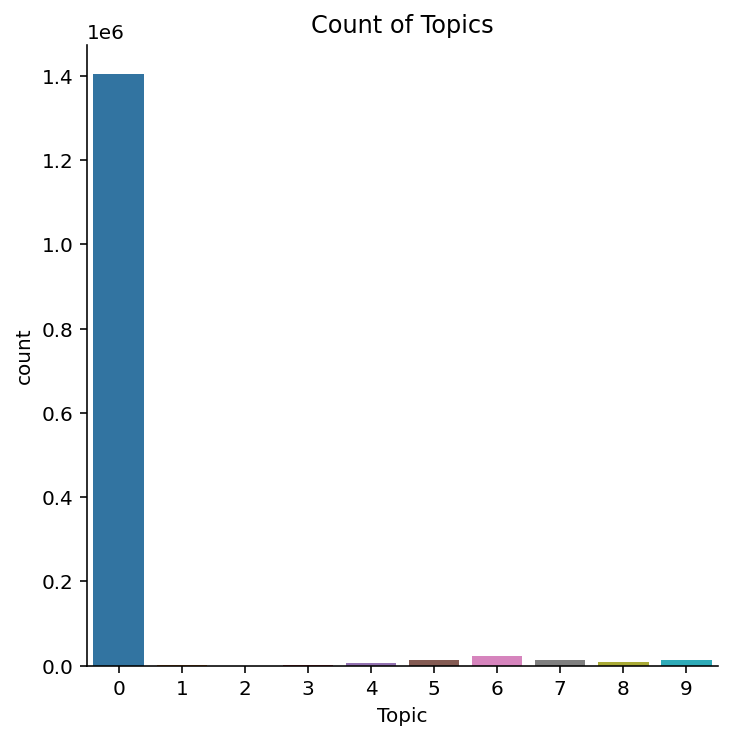

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(12, 10))
sns.catplot(x = "Topic", data = df, kind = "count")
plt.title('Count of Topics')
plt.show()

In [11]:
labels ={}
for i in df['Topic']:
    labels[i] = labels.get(i,0) + 1
labels

{0: 1403447,
 8: 7475,
 5: 13514,
 7: 14213,
 9: 13746,
 4: 7044,
 6: 22935,
 3: 2607,
 1: 1337,
 2: 38}

In [12]:
df_topics = pd.DataFrame(list(labels.items()), columns = ['Topic', 'Count'])
df_topics

,Topic,Count
0,0,1403447
1,8,7475
2,5,13514
3,7,14213
4,9,13746
5,4,7044
6,6,22935
7,3,2607
8,1,1337
9,2,38


In [13]:
df.iloc[:,1:11]

,Year,Topic 0 score,Topic 1 score,Topic 2 score,Topic 3 score,Topic 4 score,Topic 5 score,Topic 6 score,Topic 7 score,Topic 8 score
0,2019,0.90,-0.91,0.01,0.31,-0.13,0.46,-0.11,-0.11,0.33
1,2021,1.72,-0.20,1.18,-0.54,0.36,1.18,0.14,0.37,-0.95
2,2018,1.15,-1.29,0.02,0.27,-0.45,0.14,0.49,0.36,0.52
3,2018,1.78,0.72,0.56,-0.65,-0.91,0.00,0.99,-0.21,0.18
4,2020,1.05,-0.54,0.21,-0.37,0.81,-0.68,0.46,1.00,-0.49
...,...,...,...,...,...,...,...,...,...,...
1486351,2018,1.77,0.76,-0.28,0.16,0.17,0.04,1.04,0.39,0.24
1486352,2022,1.73,-0.08,0.04,0.57,0.69,-0.20,0.11,0.97,0.40
1486353,2018,0.93,0.35,0.33,-0.40,0.40,-0.77,-0.22,-0.03,0.23
1486354,2020,0.91,-0.97,0.09,0.28,0.01,0.13,-0.53,0.03,-0.36


In [14]:
X = df.iloc[:,1:11].to_numpy().tolist()
X[:5]

[[2019.0, 0.9, -0.91, 0.01, 0.31, -0.13, 0.46, -0.11, -0.11, 0.33],
 [2021.0, 1.72, -0.2, 1.18, -0.54, 0.36, 1.18, 0.14, 0.37, -0.95],
 [2018.0, 1.15, -1.29, 0.02, 0.27, -0.45, 0.14, 0.49, 0.36, 0.52],
 [2018.0, 1.78, 0.72, 0.56, -0.65, -0.91, 0.0, 0.99, -0.21, 0.18],
 [2020.0, 1.05, -0.54, 0.21, -0.37, 0.81, -0.68, 0.46, 1.0, -0.49]]

In [15]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components = 2, learning_rate='auto', init='random', n_jobs = -1).fit_transform(np.array(X))

#print(X_tsne)

In [16]:
len(X_tsne)

1486356

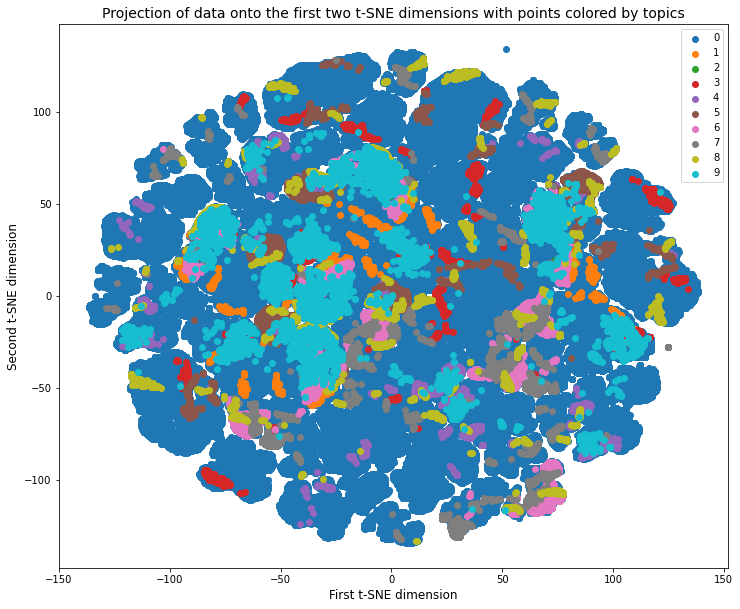

In [17]:
plt.figure(figsize=(12, 10))
for topics in np.unique(df['Topic']):
    x = X_tsne[(df['Topic'] == topics),0]
    y = X_tsne[(df['Topic'] == topics),1]
    plt.scatter(x, y, label = topics)
plt.xlabel('First t-SNE dimension', fontsize = 12)
plt.ylabel('Second t-SNE dimension', fontsize = 12)
plt.title('Projection of data onto the first two t-SNE dimensions with points colored by topics',
          fontsize = 14)
plt.legend()
plt.show()